<a href="https://colab.research.google.com/github/sychun/colab/blob/master/h_nn_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
(train_X, train_y), (test_X, test_y) = keras.datasets.imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [5]:
len(train_X[0]), train_X[0][:5]

(218, [1, 14, 22, 16, 43])

In [6]:
word_index = keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
len(word_index.keys())

88584

In [11]:
reverse_word_index = dict([(index, word) for (word, index) in word_index.items()])

In [14]:
len(reverse_word_index.keys())

88584

In [15]:
decoded_review = ' '.join([ reverse_word_index.get((i - 3), '?') for i in train_X[0]])

In [16]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
train_X = vectorize_sequences(train_X)
# 테스트 데이터를 벡터로 변환합니다
test_X = vectorize_sequences(test_X)

In [18]:
train_X.shape, train_X.shape

((25000, 10000), (25000, 10000))

In [23]:
train_y = train_y.astype('float32')
test_y = test_y.astype('float32')

In [26]:
train_y.shape

(25000,)

In [27]:
### 모델링

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=16, input_shape=(10000, ), activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [38]:
val_X = train_X[:10000]
partial_train_X = train_X[10000:]

val_y = train_y[:10000]
partial_train_y = train_y[10000:]

In [39]:
history = model.fit(partial_train_X, partial_train_y, epochs=20, batch_size=512, validation_data=(val_X, val_y))

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.5621 - accuracy: 0.7534 - val_loss: 0.4366 - val_accuracy: 0.8527
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3506 - accuracy: 0.8985 - val_loss: 0.3315 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2487 - accuracy: 0.9271 - val_loss: 0.2910 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1931 - accuracy: 0.9418 - val_loss: 0.2859 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1571 - accuracy: 0.9513 - val_loss: 0.2834 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1283 - accuracy: 0.9627 - val_loss: 0.2906 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1054 - accuracy: 0.9720 - val_loss: 0.3070 - val_accuracy: 0.8862
Epoch 8/20
30

In [41]:
# history.history
import matplotlib.pyplot as plt


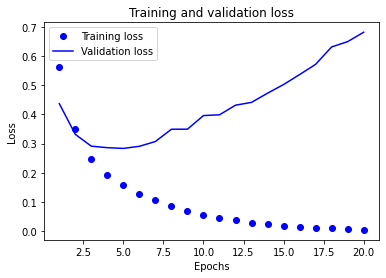

In [48]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

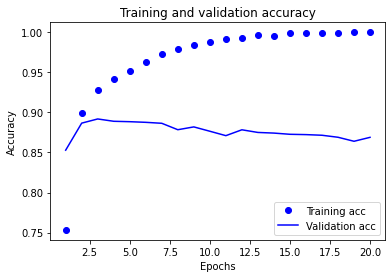

In [51]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [52]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=16, input_shape=(10000, ), activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(train_X, train_y, epochs=4, batch_size=512)
model.evaluate(test_X, test_y)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4406 - accuracy: 0.8210
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2526 - accuracy: 0.9103
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1965 - accuracy: 0.9291
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2957 - accuracy: 0.8832


[0.29573842883110046, 0.8832399845123291]